In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F #for activation functions
from torch.optim import SGD  #gradient descent

import matplotlib.pyplot as plt
import seaborn as sns



First we create an initialization for the weights and biases

Now we need to connect the NN weights and bias to inputs and activations functions. 
We create another method called forward to pass through


In [106]:
#with pytorch we start by creating a new class for a neural network

#inherits from pytorch class called moduele
class BasicNN(nn.Module): 
    #initializatoin method for parrent class
    def __init__(self):
        super().__init__()
        #create new var for weight, make it a neural network parameter == give option to optimize, requires gradient = false
        #since its a tensor neural network can take advantage of automatic differentian it provides
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad= False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad= False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad= False)
        self.b10 = nn.Parameter(torch.tensor(0), requires_grad= False)

        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad= False)
        self.w11 = nn.Parameter(torch.tensor(2.70), requires_grad= False)

        self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad=False)

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu = bottom_relu_output * self.w11

        input_to_final = scaled_bottom_relu + scaled_top_relu + self.final_bias

        output = F.relu(input_to_final)
        return output





Testing our function with input

In [107]:
input_doses = torch.linspace(start = 0, end = 1, steps = 11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [108]:
model = BasicNN()
output_values = model(input_doses)

Visualize the Output

Text(0.5, 0, 'Dosage')

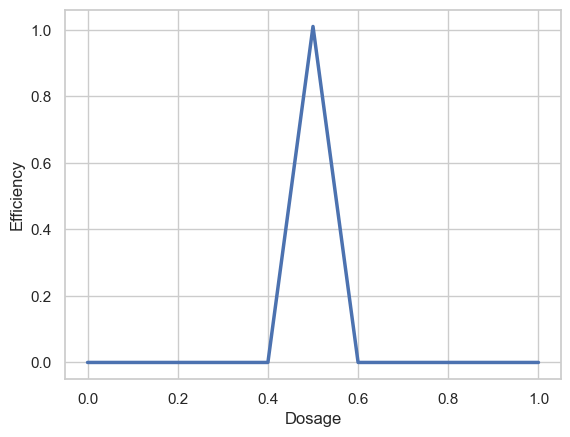

In [109]:
sns.set(style = "whitegrid")
sns.lineplot(x = input_doses, 
             y = output_values,
             linewidth = 2.5)

plt.ylabel("Efficiency")
plt.xlabel("Dosage")

Lets try to do it with backpropogation

In [110]:
#with pytorch we start by creating a new class for a neural network

#inherits from pytorch class called moduele
class BasicNN_train(nn.Module): 
    #initializatoin method for parrent class
    def __init__(self):
        super().__init__()
        #create new var for weight, make it a neural network parameter == give option to optimize, requires gradient = false
        #since its a tensor neural network can take advantage of automatic differentian it provides
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad= False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad= False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad= False)
        self.b10 = nn.Parameter(torch.tensor(0), requires_grad= False)

        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad= False)
        self.w11 = nn.Parameter(torch.tensor(2.70), requires_grad= False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True) #true = yes i wanna do back propogation

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu = bottom_relu_output * self.w11

        input_to_final = scaled_bottom_relu + scaled_top_relu + self.final_bias

        output = F.relu(input_to_final)
        return output





<Axes: xlabel='None', ylabel='None'>

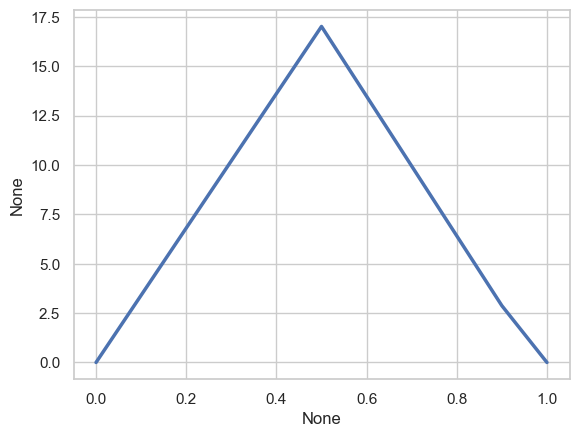

In [111]:
model = BasicNN_train()
output_values = model(input_doses)
sns.set(style = "whitegrid")
#detach creates new tensor with only values -- we strip off the gradient from the values
sns.lineplot(x = input_doses,
             y = output_values.detach(),
             linewidth = 2.5)

We see that effectiveness is 17 -- wayy too high so we need to train our model

In [115]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [117]:
optimizer = SGD(model.parameters(), lr = 0.1)
print("Final bias, before optimization" + str(model.final_bias) + '\n')


for epoch in range(100):

    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)
        loss = (output_i -label_i)**2
        
        loss.backward() #keeps information on derivatives. It accumulates the iteratives from each input iteration 

        total_loss += float(loss)

    if (total_loss < 0.0001):
        print("Num Steps:", epoch)
        print("loss: ", total_loss)
        print("Final Epoch: ", epoch)
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: ", epoch, " Final Bias :", model.final_bias , '\n')

print("Final bias, after optimization ", model.final_bias)


Final bias, before optimizationParameter containing:
tensor(-16.0375, requires_grad=True)

Step:  0  Final Bias : Parameter containing:
tensor(-16.0265, requires_grad=True) 

Step:  1  Final Bias : Parameter containing:
tensor(-16.0232, requires_grad=True) 

Step:  2  Final Bias : Parameter containing:
tensor(-16.0206, requires_grad=True) 

Step:  3  Final Bias : Parameter containing:
tensor(-16.0184, requires_grad=True) 

Num Steps: 4
loss:  7.129830191843212e-05
Final Epoch:  4
Final bias, after optimization  Parameter containing:
tensor(-16.0184, requires_grad=True)
